# Tasca 03 - 02


## Exercici 1 
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

In [1]:
#Carga de las librerías a utilizar (pandas y numpy)
import numpy as np 
import pandas as pd 

#Configuración de la visualización de columnas y líneas 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
#Carga del df Airlines Delay como un Pandas Dataframe

Air_Delay = pd.read_csv("DelayedFlights.csv")

### Exploración del data set. 
1. Método. head(): Este método retorna las 5 primeras líneas del df para poder tener una visión general del mismo. En este caso a primera vista podemos observar una columna "Unnamed: 0" que parece no ser útil al no tener una ennumeración correcta. Podemos también determinar que el data set contiene información agrupada en: 
    - Fechas del vuelo (año, mes, día) 
    - Horario de despegue y aterrizaje (real y programado)
    - Información de la aerolínea y número de vuelo
    - Tiempo en del vuelo real y programado y tiempo real en el aire
    - Tardanza del vuelo en el despegue o en el aterrizaje
    - Información sobre origen y destino del vuelo 
    - Distancia del vuelo 
    - TaxiIn - TaxiOut
    - Vuelo cancelado y código de cancelación
    - Vuelo desviado
    - Causas de la tardanza 
 
Más adelante con otros métodos de descripción del dataset definiremos en profundidad cada una de las variables. 

In [3]:
Air_Delay.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


2. Método .shape. Este método nos permite determinar el tamaño del dataset. En este caso tenemos uno con 1.936.758 observaciones (líneas) y 30 variables (columnas) 

In [4]:
Air_Delay.shape

(1936758, 30)

Antes de continuar con la exploración de los datos extraeremos la muestra solicitada de 200.000 observaciones utilizando el método .sample()

In [5]:
Air_Delay = Air_Delay.sample(200000)

#Confirmamos la extracción de la muestra con el método .shape
Air_Delay.shape

(200000, 30)

3. Método .info(). Con este método podemos obtener información sobre el nombre de las columnas, su datatype y un conteo de nulos (el análisis de nulos lo realizaremos en una sección aparte). A primera vista podríamos hacer las siguientes observaciones: 
    - las columnas DepTime, CRSDepTime, ArrTime y CRSArrTime están en formatos diferentes int64 e float 64 aunque todas indiquen un dato del tipo date (una hora). Debemos unificar su formato. 
    - Eliminaremos la columna "Unnamed:0"

Antes de continuar realizando una consulta en la página https://learn.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08 obtendremos la definición específica de cada una de las columnas

- Year: year of the flight (stored as int64).
- Month: month of the flight (stored as int64).
- DayOfMonth: day of the month (1 to 31) (stored as int64).
- DayOfWeek: day of the week (stored as int64).
- DepTime: actual departure time (stored as float64).
- CRSDepTime: scheduled departure time (stored as int64). CRS son las siglas de "Computarized Reservation System"
- ArrTime: actual arrival time (stored as float64).
- CRSArrTime: scheduled arrival time (stored as int64).
- UniqueCarrier: carrier ID (stored as object).
- FlightNum: flight number (stored as int64).
- TailNum: plane's tail number (stored as object).
- ActualElapsedTime: actual elapsed time of the flight, in minutes (stored as float64).
- CRSElapsedTime: scheduled elapsed time of the flight, in minutes (stored as float64).
- AirTime: airborne time for the flight, in minutes (stored as float64).
- ArrDelay: arrival delay, in minutes (stored as float64).
- DepDelay: departure delay, in minutes (stored as float64).
- Origin: originating airport (stored as object).
- Dest: destination airport (stored as object).
- Distance: flight distance (stored as int64).
- TaxiIn: taxi time from wheels down to arrival at the gate, in minutes (stored as float64).
- TaxiOut: taxi time from departure from the gate to wheels up, in minutes (stored as float64).
- Cancelled: cancellation status (stored as int64).
- CancellationCode: cancellation code, if applicable (stored as object).
- Diverted: diversion status (stored as int64).
- CarrierDelay: delay, in minutes, attributable to the carrier (stored float64).
- WeatherDelay: delay, in minutes, attributable to weather factors (stored as float64).
- NASDelay: delay, in minutes, attributable to the National Aviation System (stored as float64).
- SecurityDelay: delay, in minutes, attributable to security factors (stored as float64).
- LateAircraftDelay: delay, in minutes, attributable to late-arriving aircraft (stored as float64).

In [6]:
Air_Delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1050756 to 1128345
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199228 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199105 non-null  float64
 13  CRSElapsedTime     199986 non-null  float64
 14  AirTime            199105 non-null  float64
 15  ArrDelay           199105 non-null  float64


In [7]:
#Eliminamos la columna "Unnamed: 0" utilizando el método .drop()

Air_Delay.drop(["Unnamed: 0"], axis=1, inplace=True)

#Comprobamos de nuevo el tamaño del dataset para confirmar que eliminamos la columna 
Air_Delay.shape

(200000, 29)

In [8]:
# Unificamos el formato de las columnas de tiempo en float utilizando el método .astypes()

Air_Delay.astype({"CRSDepTime": "float64", "CRSArrTime": "float64"}).dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime           float64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

### Análisis de nulos - Limpieza de datos
En este apartado Realizaremos las siguientes acciones: 
- Detectar las columnas con nulos del dataset. 
- Determinar qué hacer con dichos nulos (borrarlos o imputarlos) 
- Limpiar columnas con datos no coherentes

Detección de nulos: utilizando la combinación de los métodos .isna() .sum() y .sort_values() obtendremos una lista de la suma de nulos por columna. 

Concluimos que: 
- La mayor cantidad de nulos pertenecen a las columnas que determinan las razones del delay en minutos. Es decir, se imputa Nulo en esta variable cuando el vuelo ha despegado o llegado a tiempo.  
- La suma de los datos de las 5 columnas ("LateAircraftDelay", "SecurityDelay", "NASDelay", "WeatherDelay",        "CarrierDelay" es igual al minutaje incluido en la columna "ArrDelay". Para el posterior análisis de estas variables he decidido transformar esta columna a 1 y 0 pues estableceré la proporción de las causas del retraso en la llegada de los vuelos retrasos en los vuelos. Esto quiere decir que eliminaré todos los nulos de estas columnas. Trabajaré con las nuevas columnas y borraré las que entregaban la información en minutos. 

In [10]:
# Detectar nulos

Air_Delay.isna().sum().sort_values(ascending = False)

LateAircraftDelay    71124
SecurityDelay        71124
NASDelay             71124
WeatherDelay         71124
CarrierDelay         71124
ActualElapsedTime      895
AirTime                895
ArrDelay               895
ArrTime                772
TaxiIn                 772
TaxiOut                 55
CRSElapsedTime          14
UniqueCarrier            0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
Diverted                 0
CancellationCode         0
Cancelled                0
Distance                 0
FlightNum                0
Dest                     0
Origin                   0
DepDelay                 0
Month                    0
CRSArrTime               0
TailNum                  0
Year                     0
dtype: int64

In [11]:
#Construyo una función que cree una nueva columna según la condición establecida en el np.where. 1 si el dato es
#mayor que 0, else 0. La función también borra a través del método .drop() las columnas que ya no utilizaremos.

def cambiar_causas(Air_Delay):
    Air_Delay["LateAircraftDelay_Y/N"] = np.where(Air_Delay["LateAircraftDelay"] > 0, 1, 0)
    Air_Delay["SecurityDelay_Y/N"] = np.where(Air_Delay["SecurityDelay"] > 0, 1, 0)
    Air_Delay["NASDelay_Y/N"] = np.where(Air_Delay["NASDelay"] > 0, 1, 0)
    Air_Delay["WeatherDelay_Y/N"] = np.where(Air_Delay["WeatherDelay"] > 0, 1, 0)
    Air_Delay["CarrierDelay_Y/N"] = np.where(Air_Delay["CarrierDelay"] > 0, 1, 0)
    
    Air_Delay.drop(["LateAircraftDelay", "SecurityDelay", "NASDelay", "WeatherDelay", "CarrierDelay"], axis=1, inplace=True)
    return Air_Delay

cambiar_causas(Air_Delay)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,LateAircraftDelay_Y/N,SecurityDelay_Y/N,NASDelay_Y/N,WeatherDelay_Y/N,CarrierDelay_Y/N
1050756,2008,6,3,2,2055.0,2045,21.0,20,AA,1702,N574AA,146.0,155.0,134.0,1.0,10.0,DFW,RDU,1062,4.0,8.0,0,N,0,0,0,0,0,0
1871083,2008,12,26,5,1433.0,1425,1755.0,1755,MQ,3881,N512MQ,142.0,150.0,121.0,0.0,8.0,DFW,PIT,1068,3.0,18.0,0,N,0,0,0,0,0,0
130127,2008,1,21,1,1111.0,1050,1253.0,1225,MQ,4889,N729AE,102.0,95.0,74.0,28.0,21.0,CLE,LGA,418,4.0,24.0,0,N,0,1,0,1,0,0
797038,2008,5,25,7,1504.0,1440,1658.0,1644,UA,1493,N408UA,294.0,304.0,280.0,14.0,24.0,IAD,LAS,2066,6.0,8.0,0,N,0,0,0,0,0,0
221897,2008,2,9,6,1322.0,1235,1535.0,1457,XE,2264,N14977,133.0,142.0,113.0,38.0,47.0,JAX,EWR,821,7.0,13.0,0,N,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820184,2008,12,10,3,908.0,800,1005.0,916,UA,1483,N442UA,57.0,76.0,38.0,49.0,68.0,LAS,LAX,236,4.0,15.0,0,N,0,0,0,0,0,1
1438809,2008,9,19,5,1755.0,1725,1824.0,1805,WN,1712,N652SW,89.0,100.0,74.0,19.0,30.0,SLC,PHX,507,5.0,10.0,0,N,0,1,0,0,0,1
1443788,2008,9,26,5,1754.0,1720,1859.0,1830,WN,337,N726SW,65.0,70.0,54.0,29.0,34.0,TUL,STL,351,2.0,9.0,0,N,0,1,0,0,0,1
1312370,2008,8,20,3,1705.0,1610,1822.0,1750,OH,5248,N430CA,77.0,100.0,44.0,32.0,55.0,JFK,BWI,184,10.0,23.0,0,N,0,0,0,0,0,1


In [12]:
Air_Delay.isna().sum().sort_values(ascending = False)

ArrDelay                 895
ActualElapsedTime        895
AirTime                  895
ArrTime                  772
TaxiIn                   772
TaxiOut                   55
CRSElapsedTime            14
Dest                       0
WeatherDelay_Y/N           0
NASDelay_Y/N               0
SecurityDelay_Y/N          0
LateAircraftDelay_Y/N      0
Diverted                   0
CancellationCode           0
Cancelled                  0
Distance                   0
Year                       0
Origin                     0
DepDelay                   0
Month                      0
TailNum                    0
FlightNum                  0
UniqueCarrier              0
CRSArrTime                 0
CRSDepTime                 0
DepTime                    0
DayOfWeek                  0
DayofMonth                 0
CarrierDelay_Y/N           0
dtype: int64

Aún las siguientes columnas tienen valores nulos: "ActualElapsedTime", "AirTime", "ArrDelay", "ArrTime", "TaxiIn", "TaxiOut". 
- Primero, decidimos que la información que contiene las columnas TaxiIn y TaxiOut no es relevante para el análisis posterior así que las eliminamos.  
- Segundo, realizaremos una describción estadística de las columnas "ActualElapsedTime", "AirTime", "ArrDelay", "ArrTime", "TaxiIn", "TaxiOut" para establecer la coherencia de sus datos.
- Tercero, observando la lista de nulos podemos observar que las columnas "ArrDelay", "ActualElapseTime" y "AirTime" tiene la misma cantidad de ellos, lo que en nuestro parecer significa que son observaciones incompletas. Sobre este razonamiento podríamos eliminar estas observaciones, pero de cara al ejercicio hemos decidido que: 
    1. Utilizar un histograma para determinar la distribución de la columna "AirTime" e imputar sus nulos con su media o su mediana según sea más conveniente. 
    2. Eliminaremos las observaciones con nulos de las columnas "ArrDelay" y "ActualElapsedTime" por cuanto imputarlas por su media o su mediana haría que la observación perdiera coherencia. En el caso de "ArrDelay" por cuanto dicha variable se calcula a partir de las columnas "ArrTime" y "CRSArrTime" y "ActualElapsedTime" implica un valor real y no imputado. 

In [13]:
Air_Delay[["ActualElapsedTime", "AirTime", "ArrDelay", "ArrTime", "TaxiIn", "TaxiOut"]].agg([np.mean, np.median, np.std, np.max, np.min])

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,TaxiIn,TaxiOut
mean,133.536491,108.457638,42.531654,1609.912668,6.830952,18.266313
median,116.000000,90.000000,25.000000,1714.000000,6.000000,14.000000
std,72.342997,68.838441,57.531960,548.413512,5.274163,14.527678
amax,776.000000,652.000000,1951.000000,2400.000000,184.000000,422.000000
amin,18.000000,0.000000,-60.000000,1.000000,0.000000,0.000000


Al hacer la descripción estadística de las columnas con nulos y prestando especial atención a "AirTime" nos damos cuenta que su valor mínimo es cero. Esto quiere decir hay registros de vuelos que han permanecido 0 minutos en el aire. Para limpiar los datos de la columna hemos decidido que para que la observación tenga coherencia el vuelo debe tener un mínimo de tiempo en el aire mayor a 15 minutos. Esta cifra la obtenemos de la cantidad  mínima de minutos (15) que tienen que contarse para que se determine que un vuelo tiene delay tanto en su despegue
como en su aterrizaje. (Volveremos con esto más adelante cuando hagamos el análisis de variables). Además, limpiar los outliers de AirTime nos servirá para realizar un cálculo más preciso de la variable velocidad. 

In [17]:
#Utilizamos el método .drop() condicionado para eliminar los valores entre 0 y 15 de la columna "AirTime"
Air_Delay.drop(Air_Delay[(Air_Delay["AirTime"] >= 0) & (Air_Delay["AirTime"] <= 15)].index, inplace=True)
print("El valor mínimo de la columna AirTime es: ", Air_Delay["AirTime"].agg(np.min))

El valor mínimo de la columna AirTime es:  16.0


In [18]:
#Comprobamos con un. agg las estadísticas básicas de la columna "AirTime"
Air_Delay["AirTime"].agg([np.mean, np.median, np.std, np.max, np.min])

mean      108.520070
median     90.000000
std        68.817519
amax      652.000000
amin       16.000000
Name: AirTime, dtype: float64

Los resultados nos muestran que después de eliminar los valores entre 0 y 15 de la columna "AirTime" su mediana permanece igual y su media tiene una modificación mínima al ser una estadística más sensible a los outliers. 

Ahora, realizaremos histograma para determinar la distribución de la columna "AirTime" y decidir si imputamos sus nulos con su media o su mediana

Decidimos imputar la mediana (90), pues es el valor que más se acerca al rango de distribución más poblado y es la estadística menos sensible a outliers. 

<Axes: >

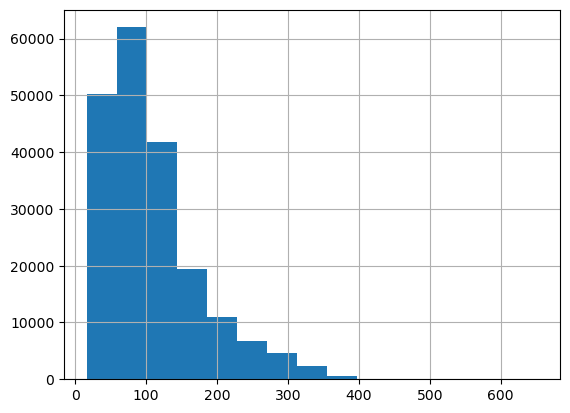

In [19]:
#Histograma de "AirTime" utilizando el método .hist() visualizando 15 bins
Air_Delay["AirTime"].hist(bins=15)

In [20]:
#Imputamos la mediana a los nulos de la columna AirTime utilizando el método .fillna()

Air_Delay["AirTime"].fillna(Air_Delay["AirTime"].median(), inplace=True)

In [21]:
#Eliminamos las observaciones con nulos de ArrDelay y ActualElapsedTime con el método .dropna()

Air_Delay.dropna(subset = ["ArrDelay", "ActualElapsedTime"], inplace = True)

In [22]:
#Comprobamos el número de datos nulos en el dataset
print("El número de datos nulos en el dataset es:", Air_Delay.isnull().sum().sum())

El número de datos nulos en el dataset es: 0


In [24]:
#Con el método shape podemos determinar que hemos perdido solo 1025 observaciones lo que representa un 0,51% del 
#dataset. Un conjunto de datos marginal. 
Air_Delay.shape

(198975, 29)

# Exercici 2
Fes un informe complet del dataset:

- Resumeix estadísticament el dataset i les columnes d’interès. 
- Fes una anàlisi estadístic del que consideris rellevant.
- Troba quantes dades faltants hi ha per columna.
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
- Fes una taula de les aerolínies amb més endarreriments acumulats.
- Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
- Aporta allò que consideris rellevant.

## Análisis de variables

Para este ejercicio utilizaremos como variables target el despegue y aterrizaje de un vuelo a tiempo (on_time). Según Umang (2008)*:
     "The  metric  currently  employed  by  the  DOT  and  airlines  to  estimate  on-time  performance  is  the 15  minutes  on-time  performance  (15-OTP),  also  referred  to  as  the  airline  dependability  statistic. According  to  this  metric,  a  flight  is  counted  as  "on  time"  if  it  operated  less  than  15  minutes later the  scheduled  time  shown  in  the  carriers'  Computerized  Reservations  Systems  (CRS).  Arrival performance  is  based  on  arrival  at  the  gate,  while  departure  performance  is  based  on  departure from  the  gate.  Moreover,  a  canceled  flight  is  classified  as  a  delayed  flight" (2008: 14)
     
Ahora bien, habiendo calculado el porcentaje de vuelos on time tanto en el despegue como en la llegada podremos determinar dicho porcentaje en relación con las aerolíneas, aeropuertos, trayectos y fechas (tanto días de la semana, como meses del año). 

Posteriormente analizaremos el número de vuelos cancelados y desviados. 

También, calculare la velocidad (distancia/tiempo) para determinar qué aerolineas y en que trayectos encontramos los vuelos más rápidos y en cuáles los más lentos. 

Finalmente, haremos un breve analísis sobre las causas de los vuelos retrasados. 

*Umang, Nitish (2008). Evaluating Passenger Delays in the US Domestic Air Transportation System. Master of Science in Transportation at the Massachusetts Institute of Technology June 2010.

### Creación columna On_Time_Arr y On_Time_Dep

Crearemos dicha columna en función del tiempo máximo esperado para despegar o para aterrizar. Si dicho tiempo es menos a 15 minutos comparado con la hora oficial de salida o llegada (CRS), tanto en el despegue como en el aterrizaje, se imputará como vuelo "on time" (1 si el vuelo despegó o llegó a tiempo, 0 si el vuelo despegó o llegó con retraso)

In [35]:
# Creación de la función on_time para construir las columas "On_Time_Arr" y "On_Time_Dep"

In [36]:
def on_time(Air_Delay):
    Air_Delay["On_Time_Arr"] = np.where(Air_Delay["ArrDelay"] <= 15, 1, 0)
    Air_Delay["On_Time_Dep"] = np.where(Air_Delay["DepDelay"] <= 15, 1, 0)
                         
    return Air_Delay

on_time(Air_Delay)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,LateAircraftDelay_Y/N,SecurityDelay_Y/N,NASDelay_Y/N,WeatherDelay_Y/N,CarrierDelay_Y/N,On_Time_Arr,On_Time_Dep
1050756,2008,6,3,2,2055.0,2045,21.0,20,AA,1702,N574AA,146.0,155.0,134.0,1.0,10.0,DFW,RDU,1062,4.0,8.0,0,N,0,0,0,0,0,0,1,1
1871083,2008,12,26,5,1433.0,1425,1755.0,1755,MQ,3881,N512MQ,142.0,150.0,121.0,0.0,8.0,DFW,PIT,1068,3.0,18.0,0,N,0,0,0,0,0,0,1,1
130127,2008,1,21,1,1111.0,1050,1253.0,1225,MQ,4889,N729AE,102.0,95.0,74.0,28.0,21.0,CLE,LGA,418,4.0,24.0,0,N,0,1,0,1,0,0,0,0
797038,2008,5,25,7,1504.0,1440,1658.0,1644,UA,1493,N408UA,294.0,304.0,280.0,14.0,24.0,IAD,LAS,2066,6.0,8.0,0,N,0,0,0,0,0,0,1,0
221897,2008,2,9,6,1322.0,1235,1535.0,1457,XE,2264,N14977,133.0,142.0,113.0,38.0,47.0,JAX,EWR,821,7.0,13.0,0,N,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820184,2008,12,10,3,908.0,800,1005.0,916,UA,1483,N442UA,57.0,76.0,38.0,49.0,68.0,LAS,LAX,236,4.0,15.0,0,N,0,0,0,0,0,1,0,0
1438809,2008,9,19,5,1755.0,1725,1824.0,1805,WN,1712,N652SW,89.0,100.0,74.0,19.0,30.0,SLC,PHX,507,5.0,10.0,0,N,0,1,0,0,0,1,0,0
1443788,2008,9,26,5,1754.0,1720,1859.0,1830,WN,337,N726SW,65.0,70.0,54.0,29.0,34.0,TUL,STL,351,2.0,9.0,0,N,0,1,0,0,0,1,0,0
1312370,2008,8,20,3,1705.0,1610,1822.0,1750,OH,5248,N430CA,77.0,100.0,44.0,32.0,55.0,JFK,BWI,184,10.0,23.0,0,N,0,0,0,0,0,1,0,0


### Porcentaje de vuelos que despegan y aterrizan a tiempo

La métrica básica del dataset es medir que porcentaje del total de vuelos aterrizan o despegan a tiempo. Tenemos que reseñar que estos resultados contrastan con los presentados por Umang. Según su texto para el mes de mayo de 2009 el número de vuelos que aterrizaron a tiempo fue del 80.5%. Realizaremos una nueva comparación con este texto al realizar el análisis de las variables según los meses del año. 

Como conclusión parcial podemos afirmar que solo 1 de cada 3 de todos los vuelos despega o aterriza a tiempo. 

In [37]:
# Porcentajes de vuelos que despegan y aterrizan a tiempo

# Objeto que contiene el conteo total de vuelos
AllFlights = Air_Delay["FlightNum"].count()

# Objeto que contiene la suma total de vuelos que despegan a tiempo
On_Time_Dep_Sum = Air_Delay["On_Time_Dep"].sum()

# Objeto que contiene la suma total de vuelos que llegan a tiempo
On_Time_Arr_Sum = Air_Delay["On_Time_Arr"].sum()

#Resultados Suma vuelos que despegan o llegan a tiempo / Total de vuelos
print("El porcentaje de vuelos que despegan a tiempo es:", On_Time_Dep_Sum / AllFlights * 100)
print("El porcenjate de vuelos que aterrizan a tiempo es:", On_Time_Arr_Sum / AllFlights * 100) 

El porcentaje de vuelos que despegan a tiempo es: 34.11433597185576
El porcenjate de vuelos que aterrizan a tiempo es: 36.96142731498932


### Despegues y aterrizajes on time según aerolineas


Calculemos ahora los porcentajes de acuerdo con las aerolíneas
Primero, determinaremos el porcentaje de vuelos por cada aerolínea. Southwest Airlines Co. (WN) tiene el mayor porcentaje (19,32%) mientras que Aloha Air Cargo (AQ) solo realiza el 0.0311% del total de vuelos. 

Según, calcularemos los porcentajes relativos, esto es la proporción de vuelos on time que realiza cada aeroline no comparados con el total de vuelos sino con el total específico de vuelos que realiza cada aerolinea. 

Aquí podemos observar que la compañia más puntual en el despegue es Aloha Air Cargo (AQ), aunque dicha compañía solo vimos antes es la compañía que menos vuelos en total realiza. La compañía menos puntual en el despegue es Mesa Airlines (YV) compañía que tan solo realiza un 3.51 del total de vuelos. 

En cuanto al aterrizaje las compañías más y menos cumplidas son las mismas que en los despegues, esto es Aloha Air Cargo (AQ), y Mesa Airlines (YV)

In [27]:
#Porcentaje general de vuelos por aerolineas
#Conteo de número de vuelos por Aerolinea / todos los vuelos 
Air_Delay.groupby("UniqueCarrier")["FlightNum"].count().sort_values(ascending = False) / AllFlights * 100

UniqueCarrier
WN    19.325543
AA     9.950496
MQ     7.313482
UA     7.298907
OO     6.769695
DL     5.931901
XE     5.389119
US     5.151401
CO     5.051388
EV     4.328685
NW     4.115090
FL     3.670310
YV     3.519538
B6     2.847091
OH     2.744566
9E     2.727478
AS     2.030908
F9     1.447418
HA     0.355321
AQ     0.031662
Name: FlightNum, dtype: float64

In [28]:
# Porcentaje relativo de vuelos que despegan a tiempo por Aerolínea

# Conteo del total de vuelos por aerolínea 
All_Fligths_per_Carrier = Air_Delay.groupby("UniqueCarrier")["FlightNum"].count()
# Suma del total de vuelos que despegan a tiempo por compañía / total de vuelos por aerolínea
On_Time_Dep_per_Carrier = Air_Delay.groupby("UniqueCarrier")["On_Time_Dep"].sum() / All_Fligths_per_Carrier * 100 
# Sort descending
On_Time_Dep_per_Carrier.sort_values(ascending = False) 

UniqueCarrier
AQ    49.206349
F9    48.298611
HA    46.817539
WN    39.833043
US    38.634146
DL    38.481742
CO    37.837031
AS    37.391735
NW    36.663410
FL    34.492674
OO    34.157387
9E    30.735213
XE    30.290031
MQ    29.679769
AA    29.673216
UA    29.560008
EV    29.525136
OH    28.621132
B6    27.449250
YV    25.803227
dtype: float64

In [29]:
#Porcentaje relativo de vuelos que aterrizan a tiempo por Aerolínea

# Suma del total de vuelos que aterrizan a tiempo por compañía / total de vuelos por aerolínea
On_Time_Arr_per_Carrier = Air_Delay.groupby("UniqueCarrier")["On_Time_Arr"].sum() / All_Fligths_per_Carrier * 100 
# Sort descending
On_Time_Arr_per_Carrier.sort_values(ascending = False) 

UniqueCarrier
AQ    55.555556
WN    47.645177
F9    45.590278
CO    43.000696
HA    41.584158
AS    41.128434
US    40.907317
DL    38.846056
FL    34.711762
OO    34.521158
UA    34.035668
9E    32.669983
NW    32.657548
MQ    32.565970
AA    32.117784
EV    31.498897
B6    31.456311
XE    31.306537
OH    26.680095
YV    26.231615
dtype: float64

### Despegues y aterrizajes on time según aeropuertos

Primero, determinaremos el porcentaje de vuelos por cada aeropuerto. Aquí agruparemos los datos primero por aeropuertos de origen y luego por aeropuertos de destino. Luego estableceremos la proporción de vuelos que despegan a tiempo de los aeropuertos de origen con mayor tráfico y la proporción de vuelos que aterrizan a tiempo en los aeropuertos de destino con más tráfico. 

En cuanto aeropuertos de origen tenemos que los aeropuertos con mayor tráfico son:
- Aeropuerto Internacional de Atlanta (ATL)
- Aeropuerto Internacional de Chicago-O´Hare (ORD)
- Aeropuerto Internacional de Dallas Fort Worth (DFW)      
- Aeropuerto Internacional de Denver (DEN)
- Aeropuerto Internacional de Los Ángeles (LAX)

Los aeropuertos de destino con más tráfico son los mismos que los aeropuertos de origen. 

Ahora tomando este conjunto de aeropuertos calcularemos los porcentajes de vuelos que despegan y aterrizan a tiempo en ellos. 


Los aeropuertos de origen que tienen mayor porcentaje de vuelos que despegan a tiempo son Denver con un 37.98% y Los Ángeles con un 37.67%

Estos mismos aeropuertos también tienen los mejores porcentajes de vuelos que aterrizan a tiempo, incluso mejorando un poco los datos de vuelos que despegan a tiempo: Los Ángeles con 41.44% y Denver con 40.14%

Tenemos que mencionar que en las dos categorías de análisis el aeropuerto con los peores porcentajes es el de Chicago con un 26.59% de vuelos que despegan a tiempo siendo él aeropuerto de origen y un 27.96 de vuelos que llegan a tiempo siendo él aeropuerto de llegada. 

In [30]:
#Porcentaje general de vuelos por aeropuerto de origen 
Air_Delay.groupby("Origin")["FlightNum"].count().sort_values(ascending = False) / AllFlights * 100

Origin
ATL    6.838045
ORD    6.495791
DFW    4.956904
DEN    3.740168
LAX    2.989320
         ...   
CMX    0.000503
BLI    0.000503
BPT    0.000503
RFD    0.000503
PIR    0.000503
Name: FlightNum, Length: 295, dtype: float64

In [38]:
#Porcentaje general de vuelos por aeropuerto de llegada
Air_Delay.groupby("Dest")["FlightNum"].count().sort_values(ascending = False) / AllFlights * 100

Dest
ORD    5.601709
ATL    5.559995
DFW    3.637140
DEN    3.235080
LAX    3.084810
         ...   
TEX    0.001005
BJI    0.001005
AKN    0.001005
WYS    0.001005
SUX    0.000503
Name: FlightNum, Length: 298, dtype: float64

In [39]:
#Porcentaje relativo de vuelos que despegan a tiempo según Aeropuerto de origen

#Conteo de todos los vuelos por aeropuerto de origen 
All_Fligths_per_Airport_Origin = Air_Delay.groupby("Origin")["FlightNum"].count()
#Suma de los vuelos que despegan a tiempo por aeorpuerto de origen / todos los vuelos por aeropuerto de origen
On_Time_Dep_per_Airport = Air_Delay.groupby("Origin")["On_Time_Dep"].sum() / All_Fligths_per_Airport_Origin * 100 
# Sort descending
On_Time_Dep_per_Airport[["ATL", "ORD", "DFW" , "DEN", "LAX"]].sort_values(ascending=False)

Origin
DEN    37.987100
LAX    37.676530
ATL    34.477436
DFW    33.022407
ORD    26.599613
dtype: float64

In [40]:
#Porcentaje relativo de vuelos que aterrizan a tiempo según Aeropuerto de llegada

#Conteo de todos los vuelos por aeropuerto de origen 
All_Fligths_per_Airport_Dest = Air_Delay.groupby("Dest")["FlightNum"].count()
#Suma de los vuelos que llegan a tiempo por aeorpuerto de aterrizaje / todos los vuelos por aeropuerto de aterrizaje
On_Time_Arr_per_Airport = Air_Delay.groupby("Dest")["On_Time_Arr"].sum() / All_Fligths_per_Airport_Dest * 100 
# Sort descending
On_Time_Arr_per_Airport[["ATL", "ORD", "DFW" , "DEN", "LAX"]].sort_values(ascending = False) 

Dest
LAX    41.446725
DEN    40.142924
DFW    35.359956
ATL    33.625599
ORD    27.965189
dtype: float64

### Despegues y aterrizajes on time según aerolínea y trayecto 

Analizaremos ahora la variable target (despegues y aterrizajes on time) según los trayectos y las aerolineas. Aquí no presentaremos los datos como porcentajes sino que haremos un conteo simple debido a la complejidad del agrupamiento. 

Respecto a los vuelos que salen tiempo tenemos que el trayecto con el mayor número de ellos es el realizado entre las ciudades de Dallas y Houston operado por la compañía Southwest Airlines Co. (125). El vuelo de regreso, es decir Houston - Dallas operado por la misma compañía también se ubica entre aquellos que tienen mayor número de vuelos despegados a tiempo (114). Hay que mencionar que este mismo vuelo en los dos trayectos, operado por la misma compañía también presenta un alto conteo de viajes que aterrizan a tiempo (128-124). Sería posible concluir que es el trayecto y la compañía más confiables para despegar o aterrizar a tiempo. 

Sobre los vuelos que aterrizan a tiempo podemos afirmar que el trayecto con el mayor número de ellos es el realizado entre Newark (EWR) y el Aeropuerto Intercontinental George Bush (IAH) operado por Continental Air Lines Inc. (135). Como en el anterior apartado, el vuelo de regreso -es decir, IAH-EWR- operado por la misma compañía también presenta un alto número de vuelos que aterrizan a tiempo (133). 

In [33]:
#Trayecto y aerolínea con mayor número de vuelos que salen a tiempo. 
Air_Delay.groupby(["UniqueCarrier", "Origin", "Dest"])["On_Time_Dep"].sum().sort_values(ascending = False)

UniqueCarrier  Origin  Dest
WN             DAL     HOU     125
               HOU     DAL     114
CO             EWR     IAH     114
AA             DFW     LAX     107
CO             IAH     EWR      94
                              ... 
OO             SLC     BHM       0
OH             JAN     CVG       0
NW             DTW     SBN       0
UA             SLC     SFO       0
XE             EWR     LIT       0
Name: On_Time_Dep, Length: 7603, dtype: int64

In [41]:
#Trayecto y aerolínea con mayor número de vuelos que aterrizan a tiempo. 
Air_Delay.groupby(["UniqueCarrier", "Origin", "Dest"])["On_Time_Arr"].sum().sort_values(ascending = False)

UniqueCarrier  Origin  Dest
CO             EWR     IAH     135
               IAH     EWR     133
WN             DAL     HOU     128
               HOU     DAL     124
AA             DFW     LAX     106
                              ... 
OH             ATL     BWI       0
                       CLE       0
US             SYR     PHL       0
               STT     LGA       0
UA             DEN     GUC       0
Name: On_Time_Arr, Length: 7603, dtype: int64

### Despegues y aterrizaje on time según fecha

Aquí queremos establecer los días de la semana y los meses del año en los cuales se presentan mayor porcentaje de vuelos que despegan y aterrizan a tiempo.

En cuanto el día de la semana podemos concluir que el sábado es el día en que despegan y aterrizan mayor porcentaje de vuelos a tiempo (35.74% - 40.00&). El viernes, es el día de la semana en que despegan y aterrizan a tiempo menor porcentaje de vuelos (32.71% - 35.00%)

Según lo meses del año podemos afirmar que es Otoño (septiembre, octubre y noviembre) la estación en la cual aterrizan y despegan más aviones con puntualidad. En ambas categorias, los meses con los peores resultados son diciembre y junio

In [50]:
#Días de la semana con mayor de vuelos que despegan a tiempo

#Conteo del total de vuelos por día
All_Fligths_per_Day = Air_Delay.groupby("DayOfWeek")["FlightNum"].count()
#Suma de todos los vuelos que llegan a tiempo por día de la semana / conteo total de vuelos por día
On_Time_Dep_per_Day = Air_Delay.groupby("DayOfWeek")["On_Time_Dep"].sum() / All_Fligths_per_Day * 100
# Sort descending
On_Time_Dep_per_Day.sort_values(ascending=False)

DayOfWeek
6    35.740119
3    35.045858
4    34.880113
1    34.137805
2    33.608969
7    33.245904
5    32.715605
dtype: float64

In [51]:
#Días de la semana con mayor de vuelos que aterrizan a tiempo

#Suma de todos los vuelos que llegan a tiempo por día de la semana / conteo total de vuelos por día
On_Time_Arr_per_Day = Air_Delay.groupby("DayOfWeek")["On_Time_Arr"].sum() / All_Fligths_per_Day * 100
# Sort descending
On_Time_Arr_per_Day.sort_values(ascending=False)

DayOfWeek
6    40.001743
3    37.573634
1    37.331244
4    37.008060
7    36.437647
2    36.290833
5    35.003598
dtype: float64

In [53]:
#Meses con mayor número de vuelos que despegan a tiempo

#Conteo del total de vuelos por mes
All_Fligths_per_Month = Air_Delay.groupby("Month")["FlightNum"].count()
#Suma de todos los vuelos que despegan a tiempo por mes / conteo total de vuelos por día
On_Time_Dep_per_Month = Air_Delay.groupby("Month")["On_Time_Dep"].sum() / All_Fligths_per_Month * 100
# Sort descending
On_Time_Dep_per_Month.sort_values(ascending=False)

Month
10    41.949513
9     38.535488
11    37.767725
5     37.363270
4     36.696960
8     34.523021
3     33.682806
1     32.676266
2     32.014203
7     31.843783
6     31.744808
12    29.511432
dtype: float64

In [54]:
#Meses con mayor número de vuelos que aterrizan a tiempo

#Suma de todos los vuelos que despegan a tiempo por mes / conteo total de vuelos por día
On_Time_Arr_per_Month = Air_Delay.groupby("Month")["On_Time_Arr"].sum() / All_Fligths_per_Month * 100
# Sort descending
On_Time_Arr_per_Month.sort_values(ascending=False)

Month
10    47.026567
9     43.424013
11    41.248154
5     39.781232
8     39.337948
4     38.545910
3     36.442051
7     35.472901
1     35.444450
2     33.866818
6     33.209656
12    31.210590
dtype: float64

### Vuelos cancelados y desviados

Aquí pretendemos realizar solo una enunciación del porcentaje de vuelos cancelados y desviados sobre el total de vuelos. Asumimos, siguiendo a Umang que tanto los vuelos cancelados como aquellos desviados entran en la categoría de vuelos retrasados. 

En esta muestra del dataset ningun vuelo fue cancelado ni tampoco desviado.  

In [65]:
#Porcentaje de vuelos cancelados
Air_Delay["Cancelled"].sum() / AllFlights * 100

0.0

In [68]:
#Porcentaje de vuelos desviados
Air_Delay["Diverted"].sum() / AllFlights * 100

0.0

### Vuelos retrasados según sus causas

En este apartado realizaremos un análisis de las causas de los retrasos. Como lo mencionamos anteriormente las causas tienen que ver con solo con los vuelos que presentan retrasos en el aterrizaje. 

Segun Umang (2010: 17) las categorías han sido definidas de la siguiente manera: 
- Air Carrier Delay: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- Extreme Weather Delay: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- National Aviation System (NAS) Delay: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- Late-arriving  aircraft:   A  previous  flight  with  same  aircraft  arrived  late,  causing  the present flight to depart late.
- Security Delays: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas

Utilizaremos All_Fligth_Not_On_Time_Some_Cause que es el total de respuestas afirmativas a la pregunta por la causa del retraso en todas de sus opciones como denominador para dividir la suma total de vuelos con respuesta afirmativa en cada causa específica del retraso. 

Finalmente, crearemos un dataset con causas y sus porcentajes y lo presentaremos en un gráfico de pie en el cual podremos verificar que según los datos las tres principales causas de tardanzas en el aterrizaje son, primero, aquellas que tienen que ver con la tardanza acumulada por el mismo avión, segundo, las relacionadas con aspectos a cargo de las aerolineas y, tercero, aquellas que tienen que ver con el National Aviation System.  

In [131]:
# Sumamos la suma de todas la respuestas positivas a cada una de las causas de tardanza en el aterrizaje
All_Fligth_Not_On_Time_Some_Cause = (Air_Delay["LateAircraftDelay_Y/N"].sum() + Air_Delay["SecurityDelay_Y/N"].sum() + 
                                    Air_Delay["NASDelay_Y/N"].sum() + Air_Delay["WeatherDelay_Y/N"].sum() + 
                                    Air_Delay["CarrierDelay_Y/N"].sum()) 

#Establecemos los porcentajes dividiendo la suma de las respuestas positivas de cada una de las causas entre el 
#total de la suma de todas las causas. 
Late_Aircraft_Delay_Pct = Air_Delay["LateAircraftDelay_Y/N"].sum() / All_Fligth_Not_On_Time_Some_Cause * 100
Security_Delay_Pct = Air_Delay["SecurityDelay_Y/N"].sum() / All_Fligth_Not_On_Time_Some_Cause * 100
NAS_Delay_Pct = Air_Delay["NASDelay_Y/N"].sum() / All_Fligth_Not_On_Time_Some_Cause * 100
Weather_Delay_Pct = Air_Delay["WeatherDelay_Y/N"].sum() / All_Fligth_Not_On_Time_Some_Cause * 100
Carrier_Delay_Pct = Air_Delay["CarrierDelay_Y/N"].sum() / All_Fligth_Not_On_Time_Some_Cause * 100

print("El porcentaje de vuelos con aterrizaje retrasado por causas de late-arriving aircraft es", np.round(Late_Aircraft_Delay_Pct, 2))
print("El porcentaje de vuelos con aterrizaje retrasado por causas de security es", np.round(Security_Delay_Pct, 2))
print("El porcentaje de vuelos con aterrizaje retrasado por causas de National Aviation System es",np.round(NAS_Delay_Pct, 2))
print("El porcentaje de vuelos con aterrizaje retrasado por causas de extreme weather es", np.round(Weather_Delay_Pct, 2))
print("El porcentaje de vuelos con aterrizaje retrasado por causas de air carrier es", np.round(Carrier_Delay_Pct, 2))
Late_Aircraft_Delay_Pct + Security_Delay_Pct + NAS_Delay_Pct + Weather_Delay_Pct + Carrier_Delay_Pct

El porcentaje de vuelos con aterrizaje retrasado por causas de late-arriving aircraft es 32.72
El porcentaje de vuelos con aterrizaje retrasado por causas de security es 0.28
El porcentaje de vuelos con aterrizaje retrasado por causas de National Aviation System es 31.12
El porcentaje de vuelos con aterrizaje retrasado por causas de extreme weather es 4.72
El porcentaje de vuelos con aterrizaje retrasado por causas de air carrier es 31.16


100.0

<Axes: ylabel='Porcentaje'>

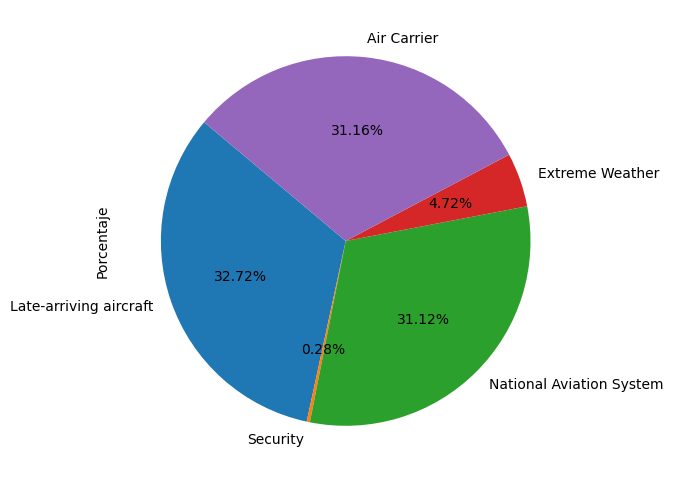

In [142]:
#Para realizar el gráfico de pie crearemos un dataset a partir de un diccionario con las causas y sus porcentajes.

data = {"Causa" : ["Late-arriving aircraft", "Security", "National Aviation System", "Extreme Weather", "Air Carrier" ],
       "Porcentaje": [Late_Aircraft_Delay_Pct, Security_Delay_Pct, NAS_Delay_Pct, Weather_Delay_Pct, Carrier_Delay_Pct ]
       }

causas_delays_pct = pd.DataFrame(data)

#Diseñamos el gráfico de pie
causas_delays_pct.set_index("Causa").plot.pie(y="Porcentaje", autopct='%1.2f%%', startangle=140, legend=False, figsize=(6, 6))


### Velocidad por vuelos con o sin retraso

Finalizaremos este análisis creando una nueva variable que corresponda a la velocidad de los vuelos asumida como la división entre la distancia ("Distance") -la multiplicaremos por 1,609 para tener la información en kilómetros- y el tiempo en el aire ("AirTime"). Esta última variable la dividiremos entre 60 para pasarla de minutos a horas Haremos una descripción estadística de nueva variable para chequear la coherencia de sus datos. 

In [157]:
#Crearemos una nueva columna "Speed"
Air_Delay["Speed"] = Air_Delay["Distance"] * 1.609 / (Air_Delay["AirTime"] / 60)

#Descripción estadística
Air_Delay["Speed"].agg([np.mean, np.median, np.std, np.max, np.min])

mean       638.345550
median     649.828387
std        122.226802
amax      2187.002308
amin        66.117731
Name: Speed, dtype: float64

Al ser parecer tan poco coherentes los resultados máximos y mínimos de la columna "Speed" (un avión no podría viajar a 66 k/hora, ni tampoco a 2187 k/h, por lo menos no en la aviación comercial cuya velocidad promedio es de 900 km/h en velocidad crucero (esto es sin contar la menor velocidad en el despegue y el aterrizaje). Por esta razón, inspeccionaremos el dataset organizando los datos de manera ascendente y descendente a partir de la columna "Speed"

In [158]:
Air_Delay.sort_values(by = "Speed", ascending=False).head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,LateAircraftDelay_Y/N,SecurityDelay_Y/N,NASDelay_Y/N,WeatherDelay_Y/N,CarrierDelay_Y/N,On_Time_Arr,On_Time_Dep,Speed
106705,2008,1,31,4,1519.0,1459,1823.0,1753,EV,4769,N931EV,124.0,114.0,26.0,30.0,20.0,XNA,ATL,589,13.0,85.0,0,N,0,1,0,1,0,0,0,0,2187.002308
733020,2008,5,8,4,1038.0,920,1128.0,1055,WN,711,N484WN,50.0,95.0,25.0,33.0,78.0,LAS,SFO,414,6.0,19.0,0,N,0,0,0,1,0,0,0,0,1598.702400
1134029,2008,7,6,7,1615.0,1420,1940.0,1801,OH,5806,N629BR,145.0,161.0,52.0,99.0,115.0,BNA,JFK,766,69.0,24.0,0,N,0,0,0,0,0,1,0,0,1422.108462
938120,2008,6,3,2,2130.0,2100,2135.0,2159,OH,5035,N689CA,65.0,119.0,41.0,-24.0,30.0,CVG,MSP,596,7.0,17.0,0,N,0,0,0,0,0,0,1,0,1403.361951
1133033,2008,7,12,6,2215.0,2100,17.0,2351,OH,5465,N933CA,122.0,171.0,46.0,26.0,75.0,JFK,IND,664,10.0,66.0,0,N,0,0,0,0,1,0,0,0,1393.533913
769873,2008,5,12,1,2240.0,2150,2247.0,2246,YV,2735,N905FJ,67.0,116.0,49.0,1.0,50.0,CLT,MSY,651,1.0,17.0,0,N,0,0,0,0,0,0,1,0,1282.602857
938759,2008,6,5,4,2030.0,1830,2335.0,2138,OH,5256,N582CA,185.0,188.0,93.0,117.0,120.0,TPA,BOS,1185,72.0,20.0,0,N,0,0,0,1,0,0,0,0,1230.106452
1371399,2008,8,3,7,1846.0,1755,1924.0,1855,MQ,3694,N729AE,38.0,60.0,18.0,29.0,51.0,FSM,DFW,228,12.0,8.0,0,N,0,1,0,0,0,1,0,0,1222.840000
1353262,2008,8,1,5,1358.0,1310,1618.0,1534,EV,4440,N659CA,140.0,144.0,76.0,44.0,48.0,ATL,BTV,960,46.0,18.0,0,N,0,0,0,0,0,1,0,0,1219.452632
1578801,2008,10,24,5,1354.0,1326,1340.0,1342,DL,1505,N932DL,46.0,76.0,27.0,-2.0,28.0,ATL,JAN,341,4.0,15.0,0,N,0,0,0,0,0,0,1,0,1219.264444


In [159]:
Air_Delay.sort_values(by = "Speed").head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,LateAircraftDelay_Y/N,SecurityDelay_Y/N,NASDelay_Y/N,WeatherDelay_Y/N,CarrierDelay_Y/N,On_Time_Arr,On_Time_Dep,Speed
1197206,2008,7,12,6,1257.0,1223,1708.0,1305,HA,137,N481HA,251.0,42.0,238.0,243.0,34.0,KOA,HNL,163,5.0,8.0,0,N,0,1,0,0,0,1,0,0,66.117731
1789436,2008,12,7,7,1840.0,1815,2158.0,1941,OH,6704,N369CA,198.0,86.0,175.0,137.0,25.0,BWI,JFK,184,13.0,10.0,0,N,0,0,0,1,0,0,0,0,101.504914
1265958,2008,7,19,6,1707.0,1629,2014.0,1810,DL,31,N922DL,187.0,101.0,160.0,124.0,38.0,JFK,BOS,187,14.0,13.0,0,N,0,1,0,1,0,1,0,0,112.831125
53148,2008,1,4,5,745.0,718,846.0,754,OO,5438,N582SW,61.0,36.0,38.0,52.0,27.0,ONT,LAX,47,13.0,10.0,0,N,0,1,0,0,0,0,0,0,119.404737
1884894,2008,12,23,2,1935.0,1900,2057.0,1953,NW,1063,N324NB,82.0,53.0,45.0,64.0,35.0,FNT,DTW,56,13.0,24.0,0,N,0,1,0,1,0,0,0,0,120.138667
1406459,2008,8,31,7,710.0,600,837.0,639,AS,73,N626AS,87.0,39.0,72.0,118.0,70.0,SIT,JNU,95,4.0,11.0,0,N,0,0,0,1,1,0,0,0,127.379167
955397,2008,6,28,6,840.0,817,941.0,849,OO,5781,N299SW,61.0,32.0,41.0,52.0,23.0,ACV,CEC,56,4.0,16.0,0,N,0,1,0,1,0,0,0,0,131.859512
1179128,2008,7,13,7,1225.0,1105,1549.0,1128,EV,4270,N836AS,264.0,83.0,256.0,261.0,80.0,ATL,GPT,352,3.0,5.0,0,N,0,0,0,1,0,0,0,0,132.742500
1460043,2008,9,13,6,929.0,837,1048.0,923,OO,5563,N227SW,79.0,46.0,62.0,85.0,52.0,SMF,SFO,86,5.0,12.0,0,N,0,0,0,1,0,0,0,0,133.910323
123731,2008,1,31,4,1932.0,1855,2111.0,1940,MQ,4096,N642AE,99.0,45.0,46.0,91.0,37.0,ORD,MKE,67,7.0,46.0,0,N,0,0,0,1,1,0,0,0,140.612609


Podemos observar que las observaciones con velocidades máximas y mínimas presentan serios problemas de coherencia. En el primer caso, el index 106705 computa una velocidad de 2187.002308 k/h habiendo recorrido 589 millas en tan solo 26 minutos. El segundo index 733020 también parece tener el mismo problema de coherencia: recorrió 414 millas en tan solo 25 minutos. La velocidad mínima parece presentar los mismos problemas de coherencia. El index 1197206 tiene una velocidad promedio de 66.11 k/h (menos que un coche). Recorrió 163 millas en casi 4 horas. En este caso podemos constatar que este vuelo tiene más tiempo de retraso en el aterrizaje (243 minutos) que tiempo efectivo en el aire (238 minutos). Al no tener variables adicionales que puedan explicarnos estas situaciones (por ejemplo, el tipo de avión) decido eliminar las diez observaciones con velocidades máximas y mínimas para realizar los análisis con esta variable. 

In [163]:
# Eliminamos los 10 valores máximos y los 10 valores mínimos de la variable "Speed"
Air_Delay.drop(Air_Delay[(Air_Delay["Speed"] <= 2187.002308) & (Air_Delay["Speed"] >= 1219.264444)].index, inplace=True)
Air_Delay.drop(Air_Delay[(Air_Delay["Speed"] >= 66.117731) & (Air_Delay["Speed"] <= 140.612609)].index, inplace=True)

Air_Delay["Speed"].agg([np.mean, np.median, np.std, np.max, np.min])

mean       638.332489
median     649.828387
std        122.035867
amax      1192.059130
amin       144.382832
Name: Speed, dtype: float64

Al parecer eliminar los 10 valores máximos y mínimos no afectó ni la media ni la mediana que permanecen iguales. 


In [167]:
print("La velocidad promedio de los vuelos comerciales en Estados Unidos en 2008 fue", np.round(Air_Delay["Speed"].mean(), 2))
print("La velocidad mediana de los vuelos comerciales en Estados Unidos en 2008 fue", np.round(Air_Delay["Speed"].median(), 2))

La velocidad promedio de los vuelos comerciales en Estados Unidos en 2008 fue 638.33
La velocidad mediana de los vuelos comerciales en Estados Unidos en 2008 fue 649.83


### Velocidad según aerolíneas

Establezcamos ahora qué aerolíneas fueron las más rapidas y cuáles las mas lentas.

La aerolínea más rápida fue Frontier Airlines Inc. (F9) con un promedio de 703.95 km/h, mientras que la más lenta fue Skywest Airlines Inc. (OO) con un promedio de 549.78 km/h

In [169]:
#Agrupo la velocidad promedio según las aerolíneas
Air_Delay.groupby("UniqueCarrier")["Speed"].mean().sort_values(ascending=False)

UniqueCarrier
F9    703.952286
AA    700.290746
CO    696.311590
UA    694.911120
AS    676.672162
DL    673.346931
B6    670.186235
US    659.698727
FL    659.398384
NW    649.610858
WN    637.130828
XE    614.550836
HA    596.070213
EV    595.998351
9E    592.654908
AQ    579.757285
OH    575.098534
MQ    568.883967
YV    561.381525
OO    549.786814
Name: Speed, dtype: float64

### Velocidad según trayectos

Según los trayectos podemos comprobar que: 
-El más rápido fue entre Kailua (KOA) y Chicago (ORD) con un promedio de 904.70 km/h
-El más lento fue entre Wrangell (WRG) y Petersburg con un promedio de tan solo 161.88 km/h

In [171]:
#Agrupo la velocidad promedio según los trayectos
Air_Delay.groupby(["Origin", "Dest"])["Speed"].mean().sort_values(ascending=False)

Origin  Dest
KOA     ORD     904.704727
XNA     CVG     902.649000
SLC     DCA     895.285014
PDX     DTW     893.566919
LAX     RDU     893.194463
                   ...    
EWR     PHL     211.344324
LAX     ONT     197.277391
ITO     KOA     193.080000
PSG     WRG     166.778080
WRG     PSG     161.887982
Name: Speed, Length: 4829, dtype: float64

## Exportación de datos a excel

In [ ]:
Air_Delay.to_excel("Air_Delay.xlsx", sheet_name="Flights_2008", index=True)